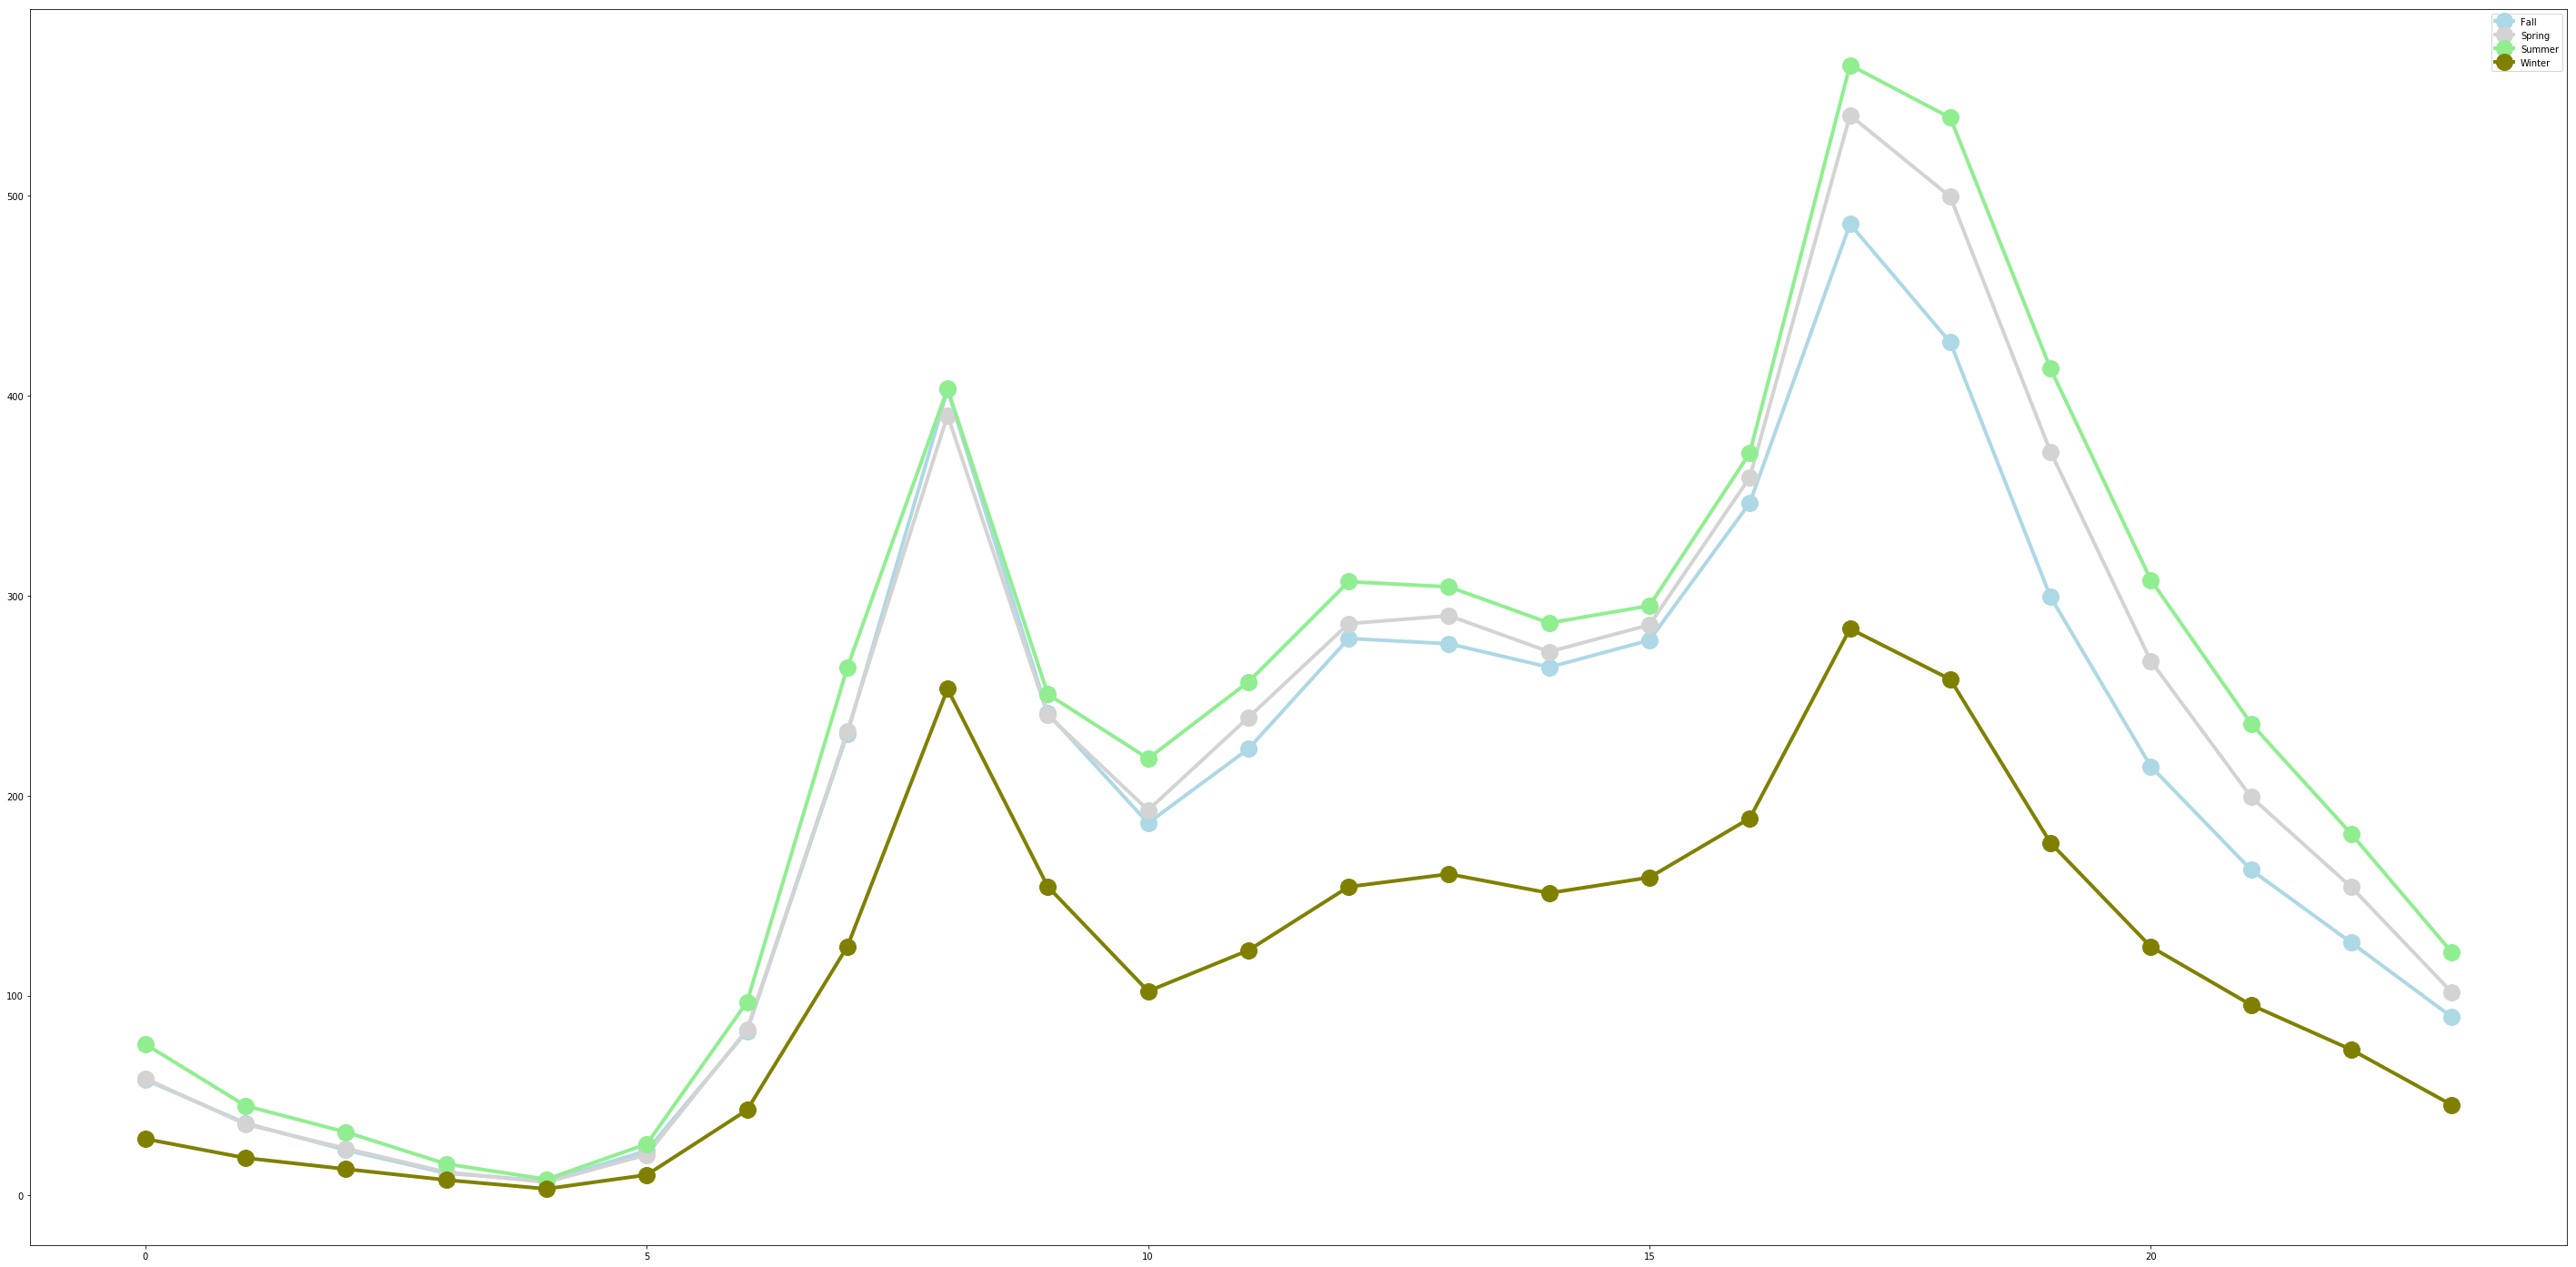

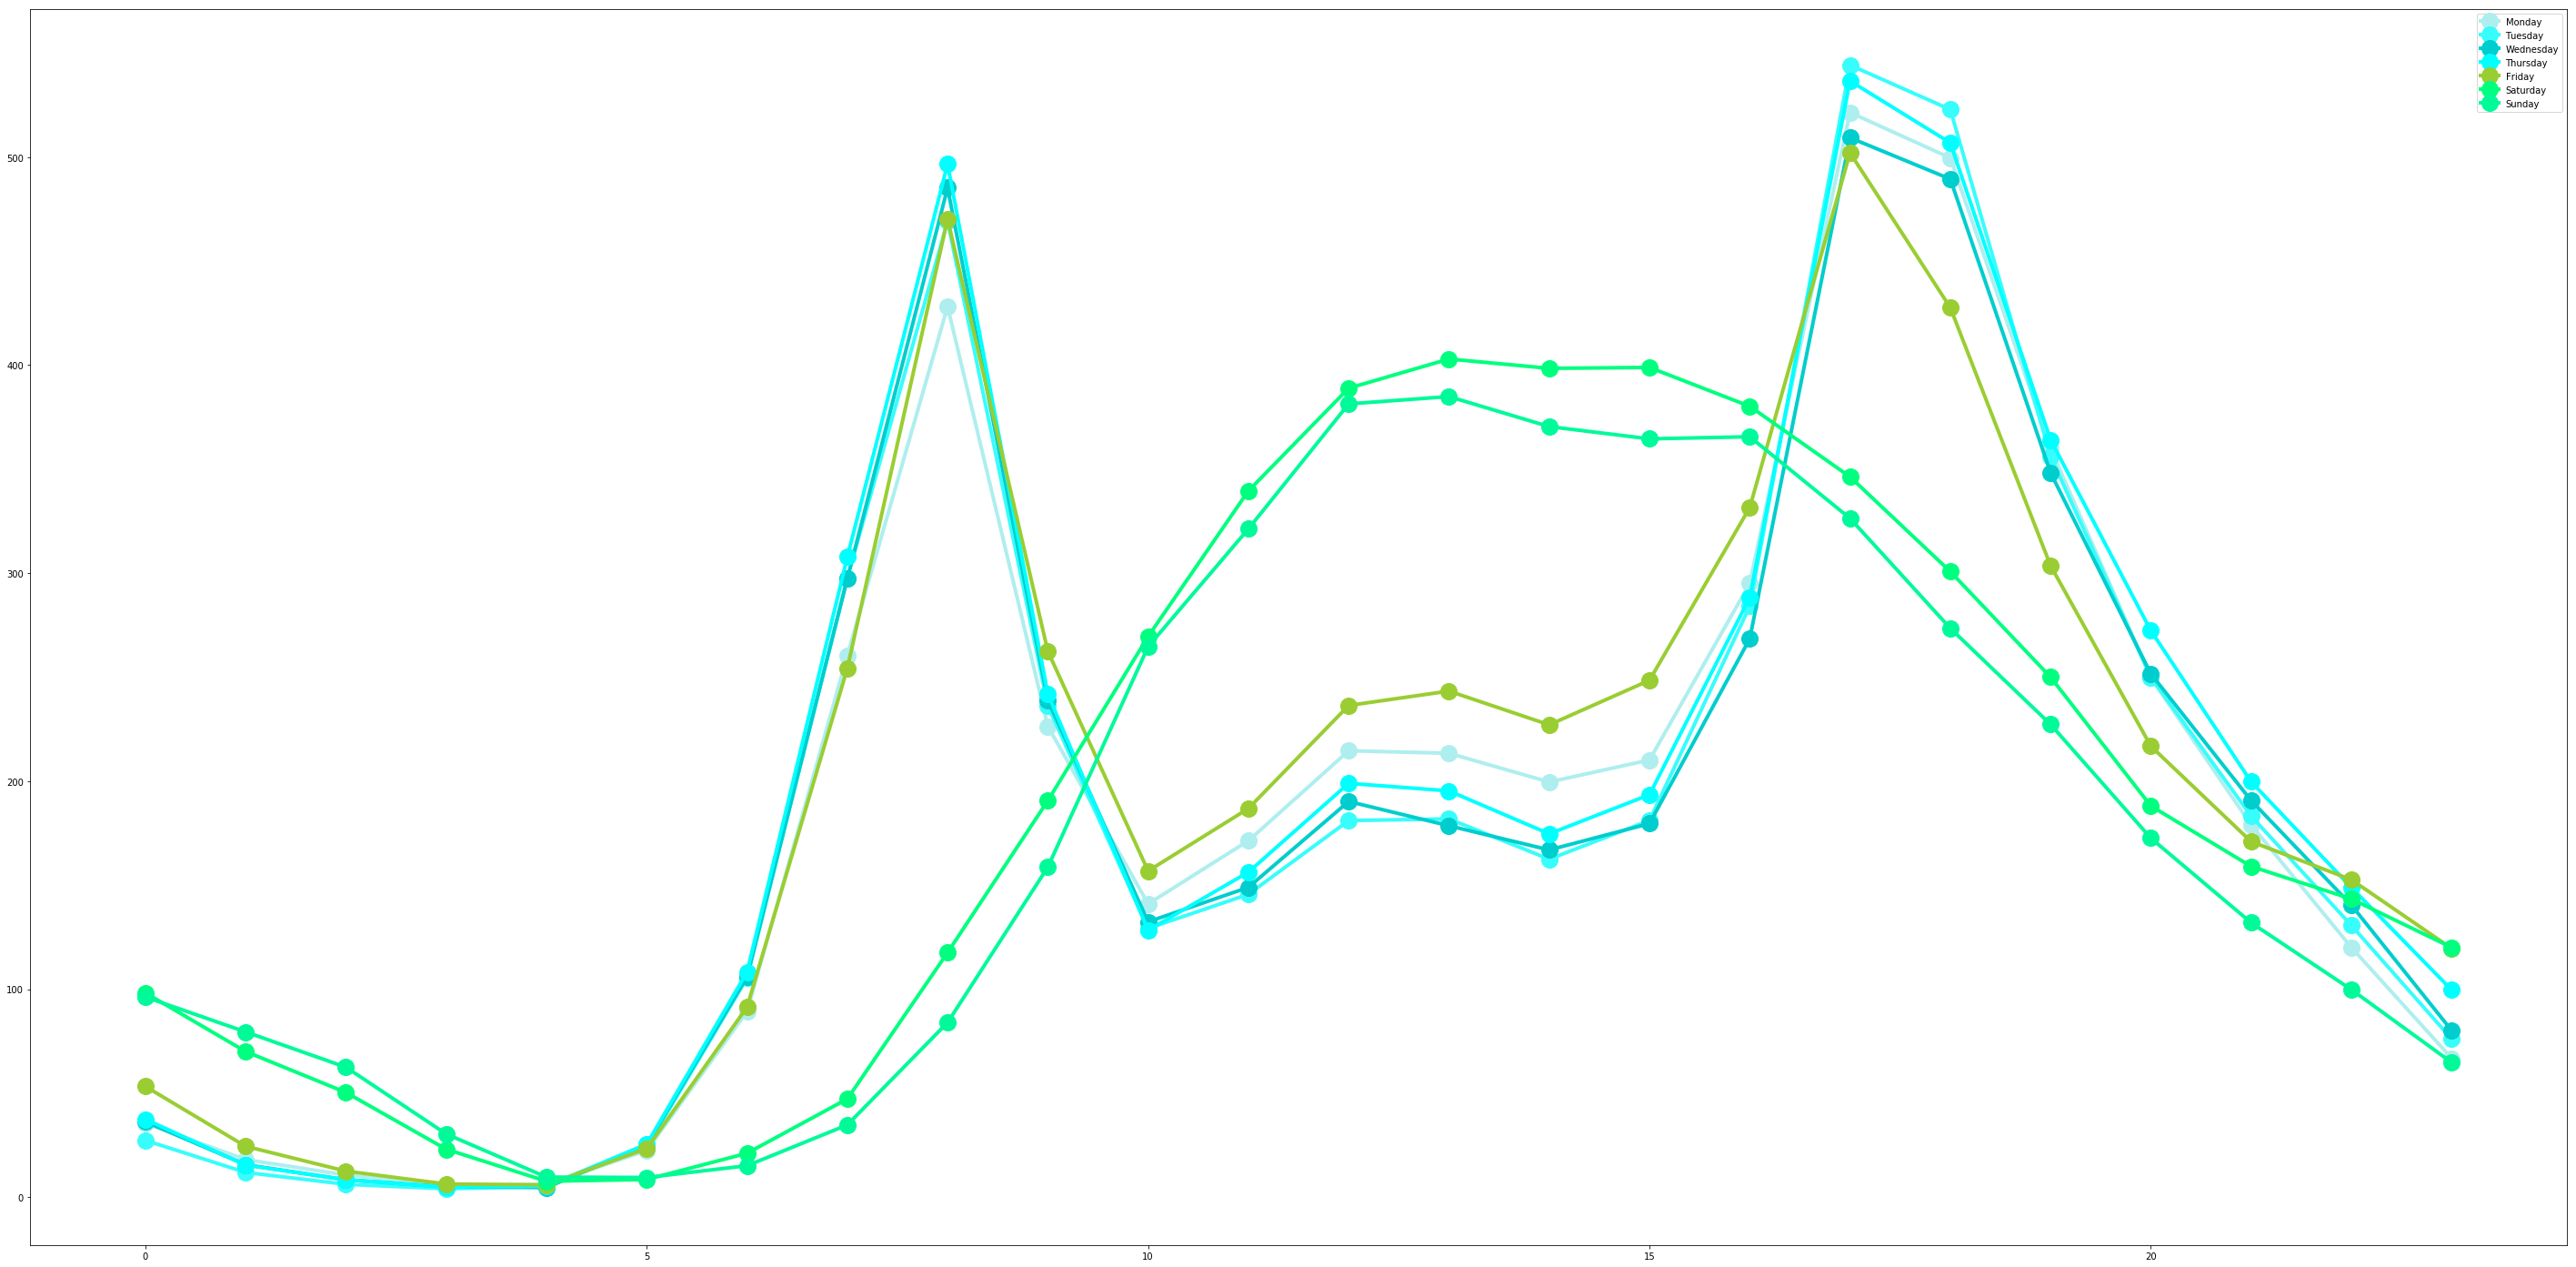

In [14]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np


def map_season(sid):
    if sid.strip() == '1':
        return 'Winter'
    elif sid.strip() == '2':
        return 'Spring'
    elif sid.strip() == '3':
        return 'Summer'
    elif sid.strip() == '4': 
        return 'Fall'
    
def tonumber(x):
    return int(x.strip())

def get_hourly_time(t):
    dt = datetime.strptime(t, '%Y-%m-%d %H:%M:%S')
    return dt.hour

def get_week_day(dte):
    dt = datetime.strptime(dte, '%Y-%m-%d %H:%M:%S')
    return str(dt.weekday())
    

df = pd.read_csv('train.csv', names=['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 
                                     'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'])
df['season_name'] = df['season'].apply(map_season)


df = df[1:]
df['rental_hours'] = df['datetime'].apply(get_hourly_time)
df['weekday'] = df['datetime'].apply(get_week_day)
df['count'] = df['count'].apply(tonumber)
df['rent_mean_by_season'] = df.groupby(['season_name', 'rental_hours'])['count'].transform('mean')


season_mean = dict()
for season in ['Fall', 'Winter', 'Spring', 'Summer']:
    season_df = df[df['season_name'] == season].head(24)
    season_mean.update({season: np.asarray(season_df.rent_mean_by_season)})
    

df2 = pd.DataFrame({'x': range(0, 24), 
                  'Fall': season_mean['Fall'], 
                  'Spring': season_mean['Spring'], 
                  'Summer': season_mean['Summer'], 
                  'Winter': season_mean['Winter']})

plt.rcParams["figure.figsize"] = (50,25)
plt.plot( 'x', 'Fall', data=df2, marker='o', markerfacecolor='lightblue', markersize=18, color='lightblue', linewidth=4)
plt.plot( 'x', 'Spring', data=df2, marker='o', markerfacecolor='lightgrey', markersize=18, color='lightgrey', linewidth=4)
plt.plot( 'x', 'Summer', data=df2, marker='o', markerfacecolor='lightgreen', markersize=18, color='lightgreen', linewidth=4)
plt.plot( 'x', 'Winter', data=df2, marker='o', markerfacecolor='olive', markersize=18, color='olive', linewidth=4)
plt.legend()
plt.show()

df['rent_mean_by_day'] = df.groupby(['weekday', 'rental_hours'])['count'].transform('mean')
df.head()

df2 = df.groupby(['rental_hours', 'weekday']).rent_mean_by_day.apply(lambda x: x.iloc[-1])
day_dict = {'0': 'Monday',
            '1': 'Tuesday',
            '2': 'Wednesday',
            '3': 'Thursday',
            '4': 'Friday',
            '5': 'Saturday',
            '6': 'Sunday'
           }

hour_means = {}

for x in range(0, 24):
    hour_means[x] = []
    for key, value in day_dict.items():
        hour_means[x].append(df2[x][int(key)])



df3 = pd.DataFrame(data=hour_means)
df4 = pd.DataFrame({'x': range(0, 24), 
              'Monday': df3.iloc[0].values, 
              'Tuesday': df3.iloc[1].values, 
              'Wednesday': df3.iloc[2].values, 
              'Thursday': df3.iloc[3].values,
              'Friday': df3.iloc[4].values,
              'Saturday': df3.iloc[5].values,
              'Sunday': df3.iloc[6].values})

plt.rcParams["figure.figsize"] = (50,25)
plt.plot( 'x', 'Monday', data=df4, marker='o', markerfacecolor='#AEEEEE', markersize=18, color='#AEEEEE', linewidth=4)
plt.plot( 'x', 'Tuesday', data=df4, marker='o', markerfacecolor='#37FDFC', markersize=18, color='#37FDFC', linewidth=4)
plt.plot( 'x', 'Wednesday', data=df4, marker='o', markerfacecolor='#00CDCD', markersize=18, color='#00CDCD', linewidth=4)
plt.plot( 'x', 'Thursday', data=df4, marker='o', markerfacecolor='#00FFFF', markersize=18, color='#00FFFF', linewidth=4)
plt.plot( 'x', 'Friday', data=df4, marker='o', markerfacecolor='#9ACD32', markersize=18, color='#9ACD32', linewidth=4)
plt.plot( 'x', 'Saturday', data=df4, marker='o', markerfacecolor='#00FF7F', markersize=18, color='#00FF7F', linewidth=4)
plt.plot( 'x', 'Sunday', data=df4, marker='o', markerfacecolor='#00FA9A', markersize=18, color='#00FA9A', linewidth=4)
plt.legend()
plt.show()









    


In [18]:
import pandas as pd

bike_rentals = df
bike_rentals.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name,rental_hours,weekday,rent_mean_by_season,rent_mean_by_day
1,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0,3,13,16,Winter,0,5,28.292035,98.212121
2,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0,8,32,40,Winter,1,5,18.761062,70.015152
3,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0,5,27,32,Winter,2,5,13.205607,50.348485
4,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0,3,10,13,Winter,3,5,7.760417,23.060606
5,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0,0,1,1,Winter,4,5,3.336634,7.666667


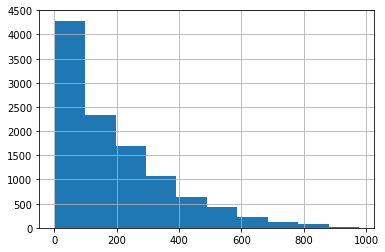

In [19]:
%matplotlib inline
bike_rentals['count'].hist()

In [20]:
bike_rentals.corr()['count']

count                  1.000000
rental_hours           0.400601
rent_mean_by_season    0.781537
rent_mean_by_day       0.809913
Name: count, dtype: float64

In [21]:
def assign_label(h):
    if h in range(6,13,1):
        return 1
    elif h in range(13,19,1):
        return 2
    elif h in range(19,25,1):
        return 3
    elif h in range(0,6,1):
        return 4

bike_rentals['time_label'] = bike_rentals.rental_hours.apply(assign_label)
bike_rentals.time_label.head()

1    4
2    4
3    4
4    4
5    4
Name: time_label, dtype: int64

In [22]:

train = bike_rentals.sample(frac=.8, random_state=1)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]
print(bike_rentals.shape[0], train.shape[0]+test.shape[0])

10886 10886


In [36]:
predictor_columns = list(bike_rentals.columns)
for col in ['casual', 'registered', 'rent_mean_by_season', 'rent_mean_by_day', 'datetime', 'season_name', 'count']:
    predictor_columns.remove(col)
predictor_columns


['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'rental_hours',
 'weekday',
 'time_label']

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(train[predictor_columns], train['count'])
labels = lr.predict(test[predictor_columns])

mse = mean_squared_error(test['count'], labels)
mse

17509.310326548653

In [45]:

from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(random_state=3)
clf.fit(train[predictor_columns], train['count'])
predictions = clf.predict(test[predictor_columns])

mse_tree = mean_squared_error(test['count'], predictions)
mse_tree


8233.205443270555

In [46]:

clf = DecisionTreeRegressor(min_samples_leaf=10, random_state=3)
clf.fit(train[predictor_columns], train['count'])
predictions = clf.predict(test[predictor_columns])

mse_tree = mean_squared_error(test['count'], predictions)
mse_tree

6619.210376411998

In [47]:

clf = DecisionTreeRegressor(max_features=5, random_state=3)
clf.fit(train[predictor_columns], train['count'])
predictions = clf.predict(test[predictor_columns])

mse_tree = mean_squared_error(test['count'], predictions)
mse_tree

9696.414561322921

In [49]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=4)
reg.fit(train[predictor_columns], train['count'])
predictions = reg.predict(test[predictor_columns])

mse_reg = mean_squared_error(test['count'], predictions)
mse_reg

4866.9276667138765

In [50]:
reg = RandomForestRegressor(min_samples_leaf=10, random_state=4)
reg.fit(train[predictor_columns], train['count'])
predictions = reg.predict(test[predictor_columns])

mse_reg = mean_squared_error(test['count'], predictions)
mse_reg

5139.670926163061